<h1 align="center"> Instituto Tecnológico de Costa Rica </h1>
<h1 align="center">Escuela de Ingeniería en Computación </h1>

<h1 align="center">IC 6200 - Inteligencia Artiﬁcial</h1>

<h2 align="center">Tarea 3: Dataset analysis </h2>

<h4 align="center">José Daniel Camacho 2017043395</h4>
<h4 align="center">Raquel Miranda Pérez 2017239247</h4>







**Analizando y preparando el dataset**

En este incremento se le realizan una serie de pruebas y analisis para saber si el dataset es apto para poder realizar predicciones, entre las pruebas se encuentran de; ruido blanco y correlación, caminata aleatoria o si es una serie estacionaria o no. Por otra parte se le aplica la transformación de raiz cuadrada al dataset para disminuir el ruido basados en lo que indican las gráficas de histograma y puntos, además smoothing de datos y predicciones mediante el algoritmo de Moving average.

Se hace uso de un solo conjunto de datos, donde se registraron mensualmente las manchas solares desde 1746 hasta 1983. Con este dataset todas las funciones propuestas en el material dado por el profesor pudieron ser implementadas. Haciendo uso de librerías para estadística y aprendizaje automático, así como también pandas, numpy y  matplotlib.

In [0]:
import pandas
from pandas import read_csv
from pandas import datetime
from pandas import concat
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from scipy.stats import boxcox
from numpy import mean
from sklearn.metrics import mean_squared_error
from numpy import sqrt
from statsmodels.tsa.stattools import adfuller

In [0]:
#se cargan los datos del csv a la variable series

series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv',
                  header = 0,
                  parse_dates = [0],
                  index_col = 0,
                  squeeze = True)
print(series.head(10), "\n")
print("series size: ", series.size, "\n")

#Descriptive statistics
#se calculan datos descriptivos del dataset
print(series.describe(), "\n")

Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
1749-06-01    83.5
1749-07-01    94.8
1749-08-01    66.3
1749-09-01    75.9
1749-10-01    75.5
Name: Sunspots, dtype: float64 

series size:  2820 

count    2820.000000
mean       51.265957
std        43.448971
min         0.000000
25%        15.700000
50%        42.000000
75%        74.925000
max       253.800000
Name: Sunspots, dtype: float64 



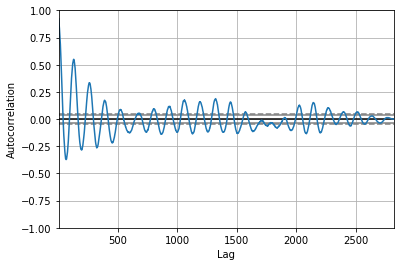

In [0]:
#comprobando que el dataset no sea ruido blanco
#se tiene una correlación un poco baja de los datos
#pero dada su media = 51 y varianza 43 podemos decir
#que los datos no son ruido blanco
autocorrelation_plot(series)
pyplot.show()

In [0]:
#comprobando que el dataset no sea una caminata aleatoria
result = adfuller(series)
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

#Esta función arroja que la serie temporal es no estacionaría pero 
#no necesariamente esto significa que la serie de tiempo es una caminata aleatoria
#esto lo corroboramos con las demás pruebas, que nos muestran un dataset válido

ADF statistic: -9.567668
p-value: 0.000000
Critical Values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [0]:
#Dado que el dataset tiene entradas por mes, queremos hacerlas diarias (upsampling)
#interpolando con una función lineal
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method = 'linear')
print(interpolated.head(40), "Size:", interpolated.size)

Month
1749-01-01    58.000000
1749-01-02    58.148387
1749-01-03    58.296774
1749-01-04    58.445161
1749-01-05    58.593548
1749-01-06    58.741935
1749-01-07    58.890323
1749-01-08    59.038710
1749-01-09    59.187097
1749-01-10    59.335484
1749-01-11    59.483871
1749-01-12    59.632258
1749-01-13    59.780645
1749-01-14    59.929032
1749-01-15    60.077419
1749-01-16    60.225806
1749-01-17    60.374194
1749-01-18    60.522581
1749-01-19    60.670968
1749-01-20    60.819355
1749-01-21    60.967742
1749-01-22    61.116129
1749-01-23    61.264516
1749-01-24    61.412903
1749-01-25    61.561290
1749-01-26    61.709677
1749-01-27    61.858065
1749-01-28    62.006452
1749-01-29    62.154839
1749-01-30    62.303226
1749-01-31    62.451613
1749-02-01    62.600000
1749-02-02    62.864286
1749-02-03    63.128571
1749-02-04    63.392857
1749-02-05    63.657143
1749-02-06    63.921429
1749-02-07    64.185714
1749-02-08    64.450000
1749-02-09    64.714286
Freq: D, Name: Sunspots, dtype: fl

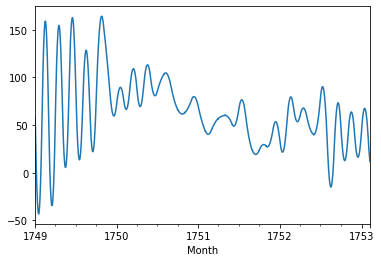

In [0]:
#Dado que el dataset tiene entradas por mes, queremos hacerlas diarias (upsampling)
#interpolando con una función polynomial de orden 2
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method = 'spline', order = 2)

#se grafican los primeros 1500 datos para poder apreciar mejor la distribución de los datos
interpolated[:1500].plot()
pyplot.show()

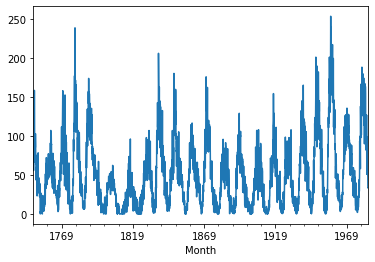

In [0]:
series.plot()
pyplot.show()

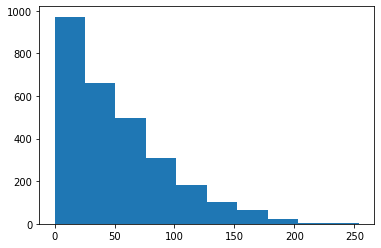

In [0]:
pyplot.hist(series)
pyplot.show()

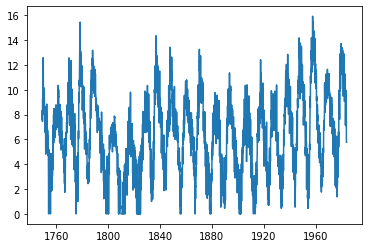

In [0]:
#Analiznado el histograma de la distribución de los datos original
#concluimos que se trata de una función exponecial, por lo tanto
#es necesario aplicar una transformación de raiz cuadrada en el dataset
#para eliminar el ruido

transform = sqrt(series)
pyplot.plot(transform)
pyplot.show()

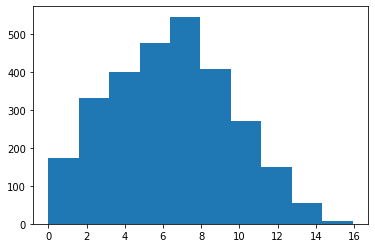

In [0]:
pyplot.hist(transform)
pyplot.show()

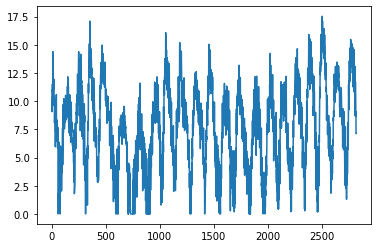

Lambda:  0.35827220693878836


In [0]:
#Aplicamos la transformación box-cox para comparar el resultado de haber elegido
#la transformación de raiz cuadrada con la que elige la librería

dataframe = DataFrame(series.values)

#se le suma 1 al dataset porque la función de boxcox no permite valores de 0
datafadd = dataframe + 1 
dataframe = datafadd

dataframe.columns = ['measures']
dataframe['measures'], lam = boxcox(dataframe['measures'])

pyplot.plot(dataframe['measures'])
pyplot.show()

print("Lambda: ", lam)

Dado que el lambda es 0.35827 aproximadamente, se acerca a 0.5 lo que indica que efectivamente es una transformación de raiz cuadrada

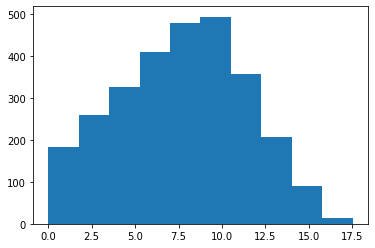

In [0]:
#se observa gran similitud comparando el histograma de los datos después de aplicar
#la transformación de raiz cuadrada y dejando a la librería escoger el lambda y
#aplicar la transformación 
pyplot.hist(dataframe['measures'])
pyplot.show()

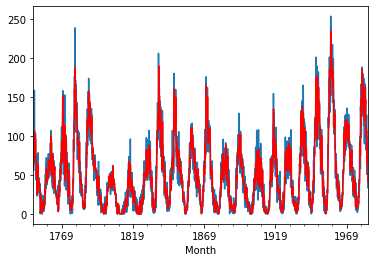

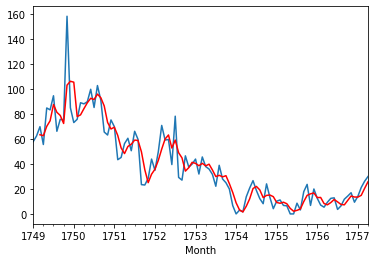

In [0]:
#Moving average smoothing para eliminar la variacion de grano fino entre los pasos del tiempo
rolling = series.rolling(window = 3)
rolling_mean = rolling.mean()

series.plot()
rolling_mean.plot(color = 'red')
pyplot.show()

series[:100].plot()
rolling_mean[:100].plot(color = 'red')
pyplot.show()

In [0]:
def trailingMovingAveragePredictions(X, p): 
  window = 3
  history = [X[i] for i in range(window)]
  test = [X[i] for i in range(window, len(X))]
  predictions = list()

  #en este for para calcular el trailing move se saca la media
  #de los últimos 3 valores que hay en el dataframe history
  #que se guardan en predictions
  for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length - window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    if(t < 10):
      print('predicted = %f, expected = %f' % (yhat ** p, obs ** p))

  rmse = sqrt(mean_squared_error(test, predictions))
  print('Test RMSE: %.3f' % rmse)

  pyplot.plot(test)
  pyplot.plot(predictions, color = 'red')
  pyplot.show()

  pyplot.plot(test[:100])
  pyplot.plot(predictions[:100], color = 'red')
  pyplot.show()

------------------------------------------Series------------------------------------------
predicted = 63.533333, expected = 55.700000
predicted = 62.766667, expected = 85.000000
predicted = 70.233333, expected = 83.500000
predicted = 74.733333, expected = 94.800000
predicted = 87.766667, expected = 66.300000
predicted = 81.533333, expected = 75.900000
predicted = 79.000000, expected = 75.500000
predicted = 72.566667, expected = 158.600000
predicted = 103.333333, expected = 85.200000
predicted = 106.433333, expected = 73.300000
Test RMSE: 16.812


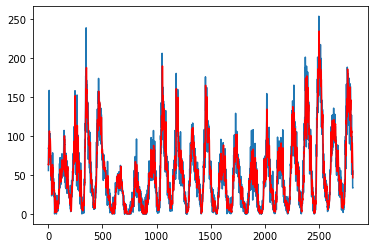

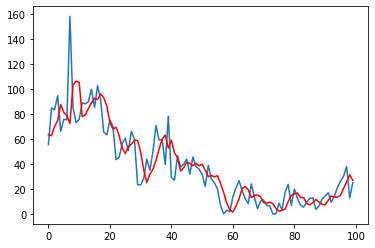

------------------------------------------Transformada------------------------------------------
predicted = 63.437984, expected = 55.700000
predicted = 62.630656, expected = 85.000000
predicted = 69.719093, expected = 83.500000
predicted = 74.078275, expected = 94.800000
predicted = 87.696402, expected = 66.300000
predicted = 81.101094, expected = 75.900000
predicted = 78.565006, expected = 75.500000
predicted = 72.497365, expected = 158.600000
predicted = 99.965226, expected = 85.200000
predicted = 103.449969, expected = 73.300000
Test RMSE: 1.186


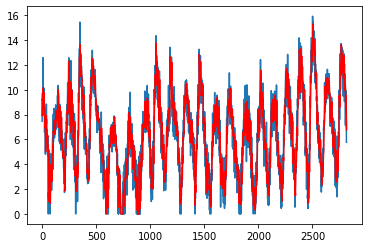

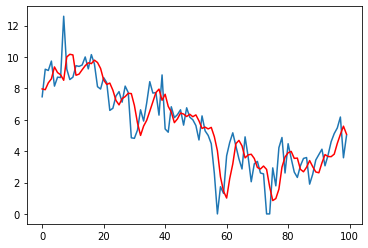

------------------------------------------Rolling_mean------------------------------------------
predicted = 65.511111, expected = 74.733333
predicted = 69.244444, expected = 87.766667
predicted = 77.577778, expected = 81.533333
predicted = 81.344444, expected = 79.000000
predicted = 82.766667, expected = 72.566667
predicted = 77.700000, expected = 103.333333
predicted = 84.966667, expected = 106.433333
predicted = 94.111111, expected = 105.700000
predicted = 105.155556, expected = 78.133333
predicted = 96.755556, expected = 79.466667
Test RMSE: 10.796


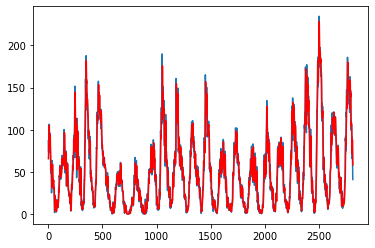

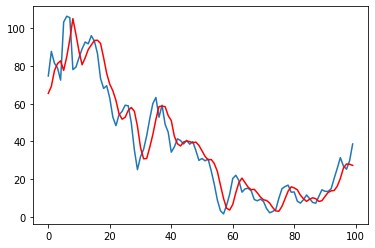

In [0]:
#se puede aplicar el algoritmo de trailing moving average para predecir valores
#dado el dataset, en este caso se aplica a el dataset sin modificar y al dataset
#ya aplicada la transformación de raiz cuadrada para reducir el ruido,
#se le hizo una modificación al algoritmo para poder imprimir los valores al cuadrado
#de la transformada y sus predicciones, dando como resultado unas predicciones un
#poco más precisas que las del dataset original
print("------------------------------------------Series------------------------------------------")
trailingMovingAveragePredictions(series.values, 1)

print("------------------------------------------Transformada------------------------------------------")
trailingMovingAveragePredictions(transform.values, 2)

print("------------------------------------------Rolling_mean------------------------------------------")
trailingMovingAveragePredictions(rolling_mean.values[2:], 1)